Predicting the Direction of the Supreme Court of the United States: A Machine Learning Approach
==================
  *  __Title__:Predicting the Direction of the Supreme Court of the United States: A Machine Learning Approach

  *  __Authors__: Roy Guy, Ziv Bogoslavsky, Miriam Horovicz 

## Paper Abstract
We construct a model designed to predict the voting behavior of the Supreme Court of the United States. Using only data available prior to the date of decision, our model correctly identifies 78% of the Court’s direction. We are using RandomForestClassifier as our model.
## Data Description
The data used in this paper is available from the [Supreme Court Database (SCDB)](http://scdb.wustl.edu/).


## Loading Data

In [1]:
import pandas as pd

data = pd.read_csv('SCDB_2020_01_justiceCentered_Citation.csv', encoding='Windows-1252')
data.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [2]:
data['dateDecision'] = pd.to_datetime(data['dateDecision'])

In [3]:
data['adminAction'].max()

118.0

In [4]:
filter_data = data[data["dateDecision"]> "2015-01-01"]
filter_data.shape

(3737, 61)

In [5]:
data = filter_data

## Remove non relevant features 

In [6]:
data = data.drop(columns = ['justice', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
                                        'usCite', 'sctCite', 'ledCite', 'lexisCite',
                                        'docket', 'caseName', 'petitionerState', 'respondentState',
                                        'adminActionState', 'caseOriginState',
                                        'caseSourceState', 'declarationUncon',
                                        'caseDispositionUnusual', 'partyWinning', 'voteUnclear',
                                        'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
                                        'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
                                        'splitVote','firstAgreement', 'secondAgreement',
                                        'dateArgument', 'dateRearg', 'petitioner', 'respondent',
                                        'term', 'caseDisposition', 'decisionDirection',
                                        'majVotes', 'minVotes', 'majority', 'vote', 'opinion',
                                        'precedentAlteration', 'issueArea','caseId','justiceName'])
data.shape

(3737, 15)

In [7]:
kk = data[['issue','caseOrigin','caseSource','certReason','lawType','naturalCourt','adminAction','direction']]
kk.head()

,issue,caseOrigin,caseSource,certReason,lawType,naturalCourt,adminAction,direction
77045,30160.0,46.0,28.0,12.0,6.0,1704,NaN,2.0
77046,30160.0,46.0,28.0,12.0,6.0,1704,NaN,2.0
77047,30160.0,46.0,28.0,12.0,6.0,1704,NaN,2.0
77048,30160.0,46.0,28.0,12.0,6.0,1704,NaN,2.0
77049,30160.0,46.0,28.0,12.0,6.0,1704,NaN,2.0


In [8]:
data = kk

## Data Manipulation 

In [9]:
data = data.dropna(axis=0, subset=['direction'])
data.shape

(3488, 8)

In [10]:
data = data.fillna(0)

In [11]:
data['direction'] = data['direction'].apply(lambda val: int(val))

In [12]:
x = data.drop('direction',axis=1)
y = data['direction']

In [13]:
x.head()

,issue,caseOrigin,caseSource,certReason,lawType,naturalCourt,adminAction
77045,30160.0,46.0,28.0,12.0,6.0,1704,0.0
77046,30160.0,46.0,28.0,12.0,6.0,1704,0.0
77047,30160.0,46.0,28.0,12.0,6.0,1704,0.0
77048,30160.0,46.0,28.0,12.0,6.0,1704,0.0
77049,30160.0,46.0,28.0,12.0,6.0,1704,0.0






## Run Model

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
def results_plot_summary(y_true, y_scores, pos_label=1, labels = ['Negative', 'Positive'], labels_colors = ['r', 'b'], figsize = (24,6), metric_round = 3, bin_count = 10):
    from sklearn import metrics
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores, pos_label=pos_label)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores, pos_label=pos_label)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=figsize)
    sns.lineplot(x=fpr, y=tpr, ax=ax1)
    ax1.set_title('Receiver Operating Characteristic')
    ax1.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax1.plot([0, 1], [0, 1])
    sns.lineplot(x=recall, y=precision, ax=ax2)
    ax2.set_title('Precision Recall Curve')
    ax2.set(xlabel='Recall', ylabel='Precision')
    sns.distplot(y_scores[y_true!=pos_label], bins = bin_count, kde=False, norm_hist=True, label=labels[0], color=labels_colors[0], ax=ax3)
    sns.distplot(y_scores[y_true==pos_label], bins = bin_count, kde=False, norm_hist=True, label=labels[1], color=labels_colors[1], ax=ax3)
    ax3.legend()
    ax3.set_title('Probabilities')
    ax3.set(xlabel='Score', ylabel='Density')

    plt.show()
    
def calc_metrics(y_true, y_pred, y_scores, pos_label = 1):
    output = {
        'precision'              : metrics.precision_score(y_true, y_pred),
        'recall'                 : metrics.recall_score(y_true, y_pred),
        'average_precision_score': metrics.average_precision_score(y_true, y_scores),
        'f1_score'               : metrics.f1_score(y_true, y_pred), 
        'roc_auc_score'          : metrics.roc_auc_score(y_true, y_scores)
    }
    return output

def conf_matrix_threshold(y_true, y_scores, th = 0.5, labels = ['conservative', 'liberal'], labels_alias = ['Negative', 'Positive'], round_dec = 2):
    y_pred = np.where(y_scores >= th, labels[1], labels[0])
    conf_matrix = pd.DataFrame(
        metrics.confusion_matrix(y_true, y_pred), 
        index   = ['Actual ' + labels_alias[0]   , 'Actual ' + labels_alias[1]], 
        columns = ['Predicted ' + labels_alias[0], 'Predicted ' + labels_alias[1]]
    )
    specifity         = round(100*(conf_matrix.iloc[0,0]) / (conf_matrix.iloc[0,0] + conf_matrix.iloc[0,1]), round_dec)
    FPR               = round(100*(conf_matrix.iloc[0,1]) / (conf_matrix.iloc[0,1] + conf_matrix.iloc[0,0]), round_dec)
    recall            = round(100*(conf_matrix.iloc[1,1]) / (conf_matrix.iloc[1,0] + conf_matrix.iloc[1,1]), round_dec)
    precision         = round(100*(conf_matrix.iloc[1,1]) / (conf_matrix.iloc[0,1] + conf_matrix.iloc[1,1]), round_dec)
    accuracy          = round(100*(conf_matrix.iloc[1,1] + conf_matrix.iloc[0,0]) / (conf_matrix.iloc[0,0] + conf_matrix.iloc[0,1] + conf_matrix.iloc[1,0] + conf_matrix.iloc[1,1]), round_dec)
    balanced_accuracy = round((specifity + recall)/2, round_dec)  

    
    output = {
        'specifity'         : [specifity],
        'FPR'               : [FPR],
        'recall'            : [recall],
        'precision'         : [precision],
        'accuracy'          : [accuracy],
        'balanced_accuracy' : [balanced_accuracy]
    }
    return conf_matrix, output

## Model training and performance results 

--Model Performance Charts--



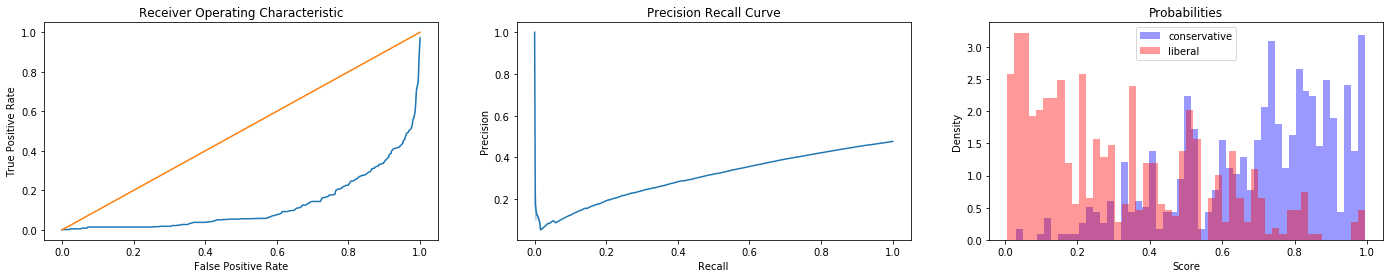


--Confusion Matrix at Cutoff = 0.5--

                     Predicted conservative  Predicted liberal
Actual conservative                     413                136
Actual liberal                          115                488

--Metrics at Cutoff = 0.5--

         specifity   FPR  recall  precision  accuracy  balanced_accuracy
Metrics       75.2  24.8    80.9       78.2      78.2               78.1


In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics

x   = x_train
y   = y_train
x_t = x_test
y_t = y_test


model_rf    = RandomForestClassifier(n_estimators = 2000, max_depth = 12)
model_rf.fit(x, y)

y_scores = model_rf.predict_proba(x_t)[:,1]
y_pred   = model_rf.predict(x_t)

# Print out the results
print('--Model Performance Charts--')
print()

results_plot_summary(y_test, y_scores, pos_label = 1, labels = ['conservative', 'liberal'], labels_colors = ['b', 'r'], figsize = (24,4), metric_round = 4, bin_count = 50)

th_conf = 0.5
print()
print(f'--Confusion Matrix at Cutoff = {th_conf}--')
print()
conf_matrix, metrics_at_target = conf_matrix_threshold(y_test, y_scores, th = th_conf, labels = [1, 2], labels_alias = ['conservative', 'liberal'], round_dec = 1)
print(conf_matrix)
print()
print(f'--Metrics at Cutoff = {th_conf}--')
print()
print(pd.DataFrame(metrics_at_target, index=['Metrics']))

## Important Features 

In [18]:
f_importance = pd.DataFrame({'Importance': model_rf.feature_importances_}, index = x_train.columns).sort_values('Importance', ascending=False)
f_importance.head(20)

,Importance
issue,0.267337
caseOrigin,0.231112
caseSource,0.143614
lawType,0.105673
certReason,0.104328
naturalCourt,0.101521
adminAction,0.046416
